## COVID-19
### Italy, data source:  https://github.com/pcm-dpc/COVID-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#### gathering data from https://github.com/pcm-dpc/COVID-19

In [13]:
df_italy = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
df_italy.tail(3)

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
35,2020-03-30T17:00:00,ITA,27795,3981,31776,43752,75528,1648,4050,14620,11591,101739,477359,NaN,NaN
36,2020-03-31T17:00:00,ITA,28192,4023,32215,45420,77635,2107,4053,15729,12428,105792,506968,NaN,NaN
37,2020-04-01T17:00:00,ITA,28403,4035,32438,48134,80572,2937,4782,16847,13155,110574,541423,NaN,NaN


In [14]:
df_italy = df_italy.rename(columns={'data':'date', 'stato':'country', 'ricoverati_con_sintomi':'hospitalized', 'terapia_intensiva':'ICU',
                         'totale_ospedalizzati':'hospitalized_total',
                         'isolamento_domiciliare':'home_confinement',
                         'totale_positivi':'confirmed_active',
                         'nuovi_positivi':'confirmed_new',
                         'dimessi_guariti':'recovered',
                         'deceduti':'deaths',
                         'totale_casi':'confirmed',
                         'tamponi':'tests'
                        })
df_italy['date'] = pd.to_datetime(df_italy.date)
df_italy = df_italy.set_index('date')
df_italy

,country,hospitalized,ICU,hospitalized_total,home_confinement,confirmed_active,variazione_totale_positivi,confirmed_new,recovered,deaths,confirmed,tests,note_it,note_en
date,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN
2020-02-25 18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN
2020-02-26 18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN
2020-02-27 18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN
2020-02-28 18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN
2020-02-29 18:00:00,ITA,401,105,506,543,1049,228,240,50,29,1128,18661,NaN,NaN
2020-03-01 18:00:00,ITA,639,140,779,798,1577,528,566,83,34,1694,21127,NaN,NaN
2020-03-02 18:00:00,ITA,742,166,908,927,1835,258,342,149,52,2036,23345,NaN,NaN
2020-03-03 18:00:00,ITA,1034,229,1263,1000,2263,428,466,160,79,2502,25856,NaN,NaN


In [15]:
df_italy_regions = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-regioni/dpc-covid19-ita-regioni.csv', parse_dates=['data'])
df_italy_regions = df_italy_regions.rename(columns={'data':'date', 'stato':'country', 'ricoverati_con_sintomi':'hospitalized', 'terapia_intensiva':'ICU',
                         'totale_ospedalizzati':'hospitalized_total',
                         'isolamento_domiciliare':'home_confinement',
                         'totale_positivi':'confirmed_active',
                         'nuovi_positivi':'confirmed_new',
                         'dimessi_guariti':'recovered',
                         'deceduti':'deaths',
                         'totale_casi':'confirmed',
                         'tamponi':'tests',
                         'codice_regione':'region_code',
                         'denominazione_regione':'region'            
                        })
df_italy_regions = df_italy_regions.set_index(['region','date'])
df_italy_regions

,,country,region_code,lat,long,hospitalized,ICU,hospitalized_total,home_confinement,confirmed_active,variazione_totale_positivi,confirmed_new,recovered,deaths,confirmed,tests,note_it,note_en
region,date,,,,,,,,,,,,,,,,,
Abruzzo,2020-02-24 18:00:00,ITA,13,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN
Basilicata,2020-02-24 18:00:00,ITA,17,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
P.A. Bolzano,2020-02-24 18:00:00,ITA,4,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN
Calabria,2020-02-24 18:00:00,ITA,18,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN
Campania,2020-02-24 18:00:00,ITA,15,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toscana,2020-04-01 17:00:00,ITA,9,43.769231,11.255889,1120,297,1417,3015,4432,206,259,182,253,4867,36575,NaN,NaN
P.A. Trento,2020-04-01 17:00:00,ITA,4,46.068935,11.121231,345,76,421,1062,1483,94,124,214,173,1870,7675,NaN,NaN
Umbria,2020-04-01 17:00:00,ITA,10,43.106758,12.388247,173,45,218,646,864,13,17,194,37,1095,9080,NaN,NaN


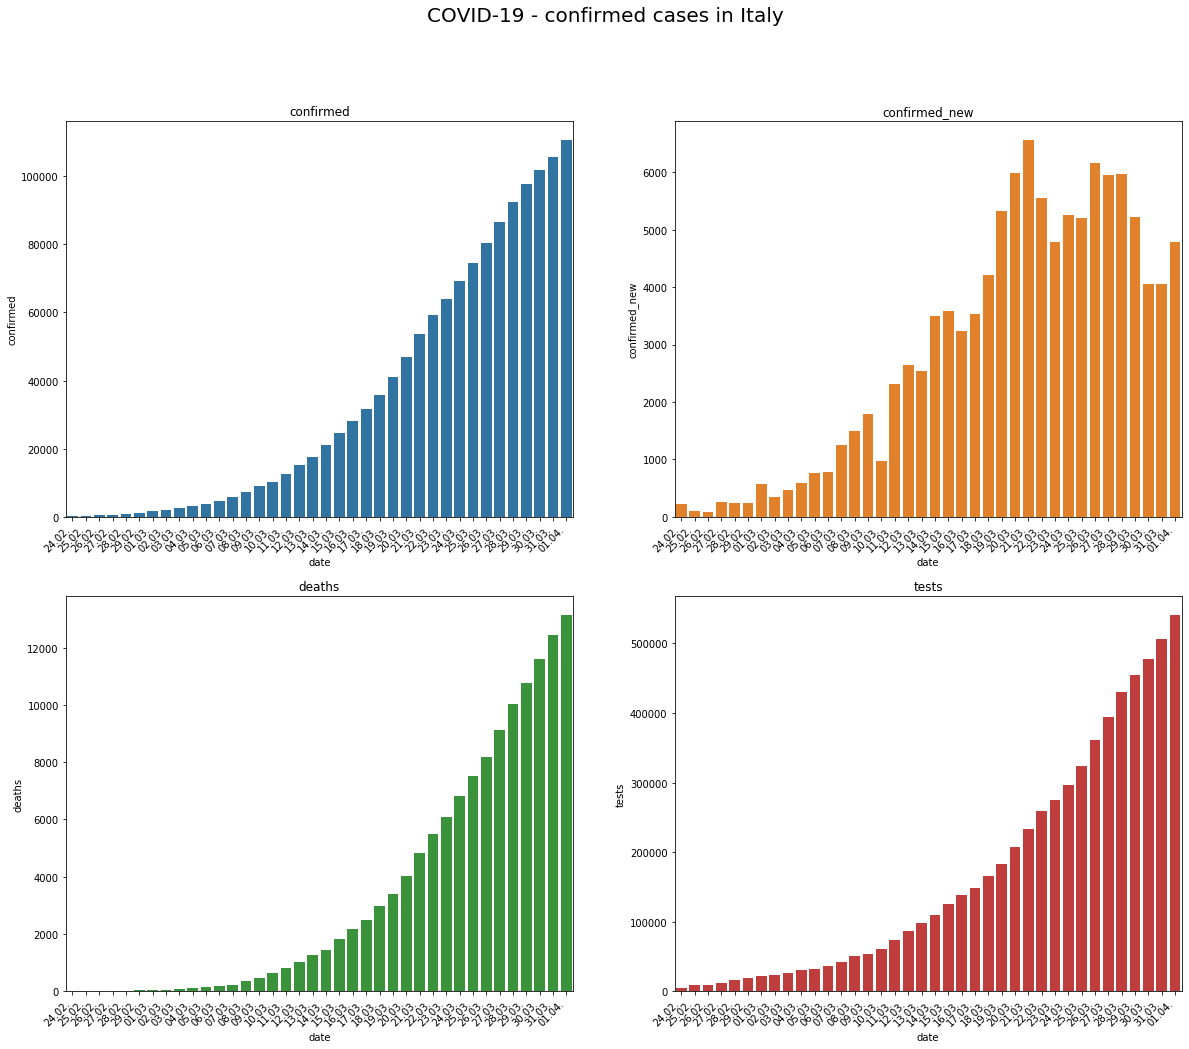

In [16]:
fig, ax = plt.subplots(2,2,figsize=(20,16))
for i, ctype in enumerate(['confirmed', 'confirmed_new', 'deaths', 'tests'], 1):
    plt.subplot(2,2,i)
    ax = sns.barplot(data=df_italy, x=df_italy.index, y=ctype, color=str('C' + str(i-1)))
    xticks = [xdate.strftime('%d.%m.') for xdate in df_italy.index]
    _ =ax.set_xticklabels(xticks, rotation=45, ha='right')
    _ = ax.set_title(ctype)
_ = plt.suptitle('COVID-19 - confirmed cases in Italy',fontsize=20)



In [17]:
df_italy_regions.groupby(level=0).confirmed.max().sort_values(ascending=False)

region
Lombardia                44773
Emilia-Romagna           14787
Piemonte                  9795
Veneto                    9625
Toscana                   4867
Marche                    3962
Liguria                   3660
Lazio                     3264
Campania                  2231
Puglia                    1946
P.A. Trento               1870
Sicilia                   1718
Friuli Venezia Giulia     1685
Abruzzo                   1436
P.A. Bolzano              1418
Umbria                    1095
Sardegna                   745
Calabria                   669
Valle d'Aosta              631
Basilicata                 237
Molise                     160
Name: confirmed, dtype: int64

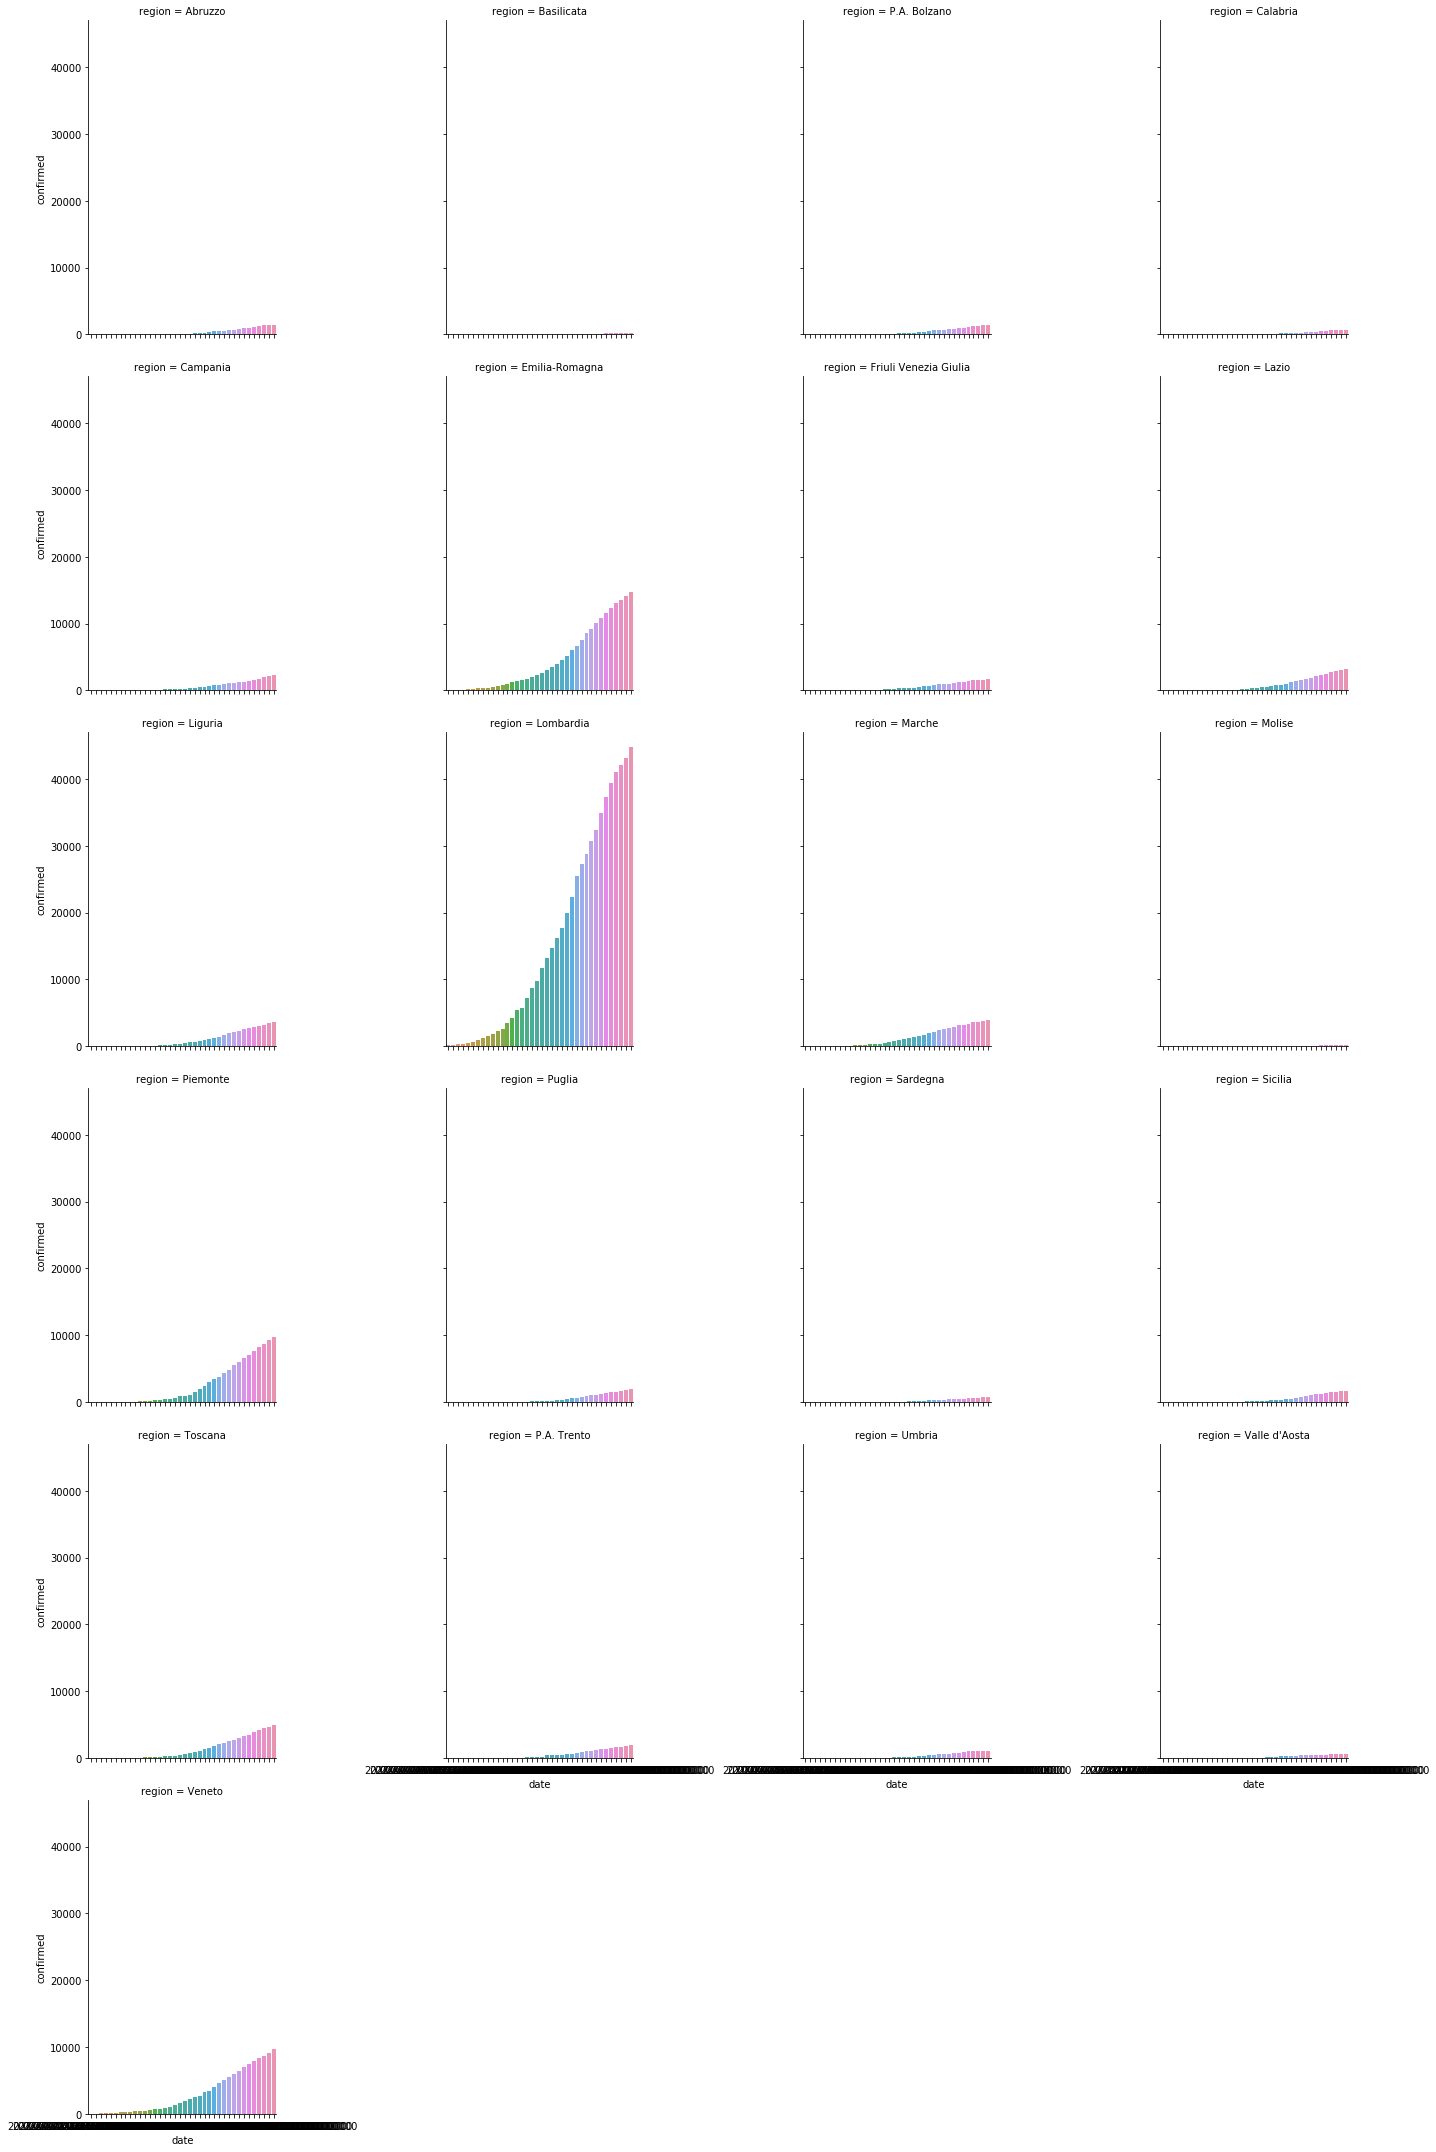

In [18]:
sns.catplot(kind='bar', data=df_italy_regions.reset_index(), x='date', y='confirmed', col='region', col_wrap=4, facet_kws={'sharey':False})